### <font color='e28743'>CS_5002 Final Project<font><a class='anchor' id='top'></a>
- [Section 1](#1)
- [Section 2](#2)
- [Section 3](#3)

<h1 align="center"><font color='green'>Header 1</font></h1>
<h2 align="center"> <font color='gray'>Header 2</font></h2>
<h3 align="center"> <font color='blue'>Header 3</font></h3>

1. Import necessary libraries:

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import csv


2. Define the input file name and initialize an empty dictionary to store the data. Read the CSV file and store the data in the dictionary:

In [20]:
filename = "event_planning.csv"
data = []

with open(filename, newline='', encoding='UTF-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

3. Define the virtual start and end nodes, and build the node dictionary and edge list based on the input data:

In [21]:
start_node = 'VI'
end_node = 'VO'
node_dict = {start_node: 0, 'A': 3, 'B': 2, 'C': 2, 'D': 4,
             'E': 3, 'F': 2, 'G': 3, 'H': 1, 'I': 5,
             'J': 2, 'K': 10, end_node: 0}
edge_list = [(start_node, 'A'), (start_node, 'B'), ('A', 'C'), ('B', 'C'),
             ('C', 'D'), ('C', 'E'), ('E', 'F'), ('D', 'F'),
             ('C', 'G'), ('G', 'H'), ('F', 'I'), ('H', 'J'),
             ('I', 'J'), ('J', 'K'), ('K', end_node)]


5. Add the edges to a directed graph object. And check if the graph is a valid directed acyclic graph (DAG):

In [22]:
G = nx.DiGraph()
G.add_edges_from(edge_list)

is_valid_DAG = nx.is_directed_acyclic_graph(G)
print(f'G is a valid directed acyclic graph: {is_valid_DAG}')

G is a valid directed acyclic graph: True


6. Define a function to find the longest path in the DAG using a brute-force approach. Call the function to find the longest path and its length:

In [23]:
def find_longest_path(graph, start, end):
    longest_path = []
    longest_length = float('-inf')  # Initialize to negative infinity

    for path in nx.all_simple_paths(graph, start, end):
        length = 0
        for node in path:
            length += node_dict[node]
        if length > longest_length:
            longest_length = length
            longest_path = path

    return longest_path, longest_length

longest_path, longest_length = find_longest_path(G, start_node, end_node)


7. Get the edges of the longest path:

In [24]:
edges_lp = list(zip(longest_path, longest_path[1:]))


8. Visualize the graph using a spring layout(can use other layout, too), and color the nodes and edges of the critical path:

In [25]:
pos = nx.spring_layout(G)  # other layout options available:  spectral, planar, random, etc.
node_col = ['red' if node in longest_path else 'steelblue' for node in G.nodes()]
edge_colors = ['red' if edge in edges_lp else 'grey' for edge in G.edges()]

9. Format and plot the graph. Apply the data visualization.

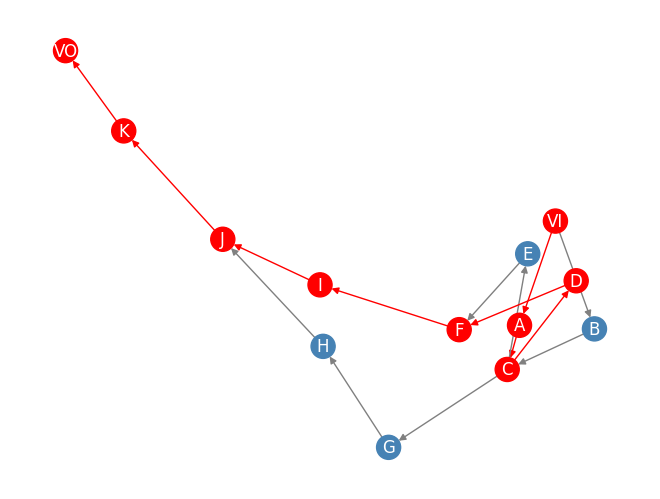

In [26]:
nx.draw(G, pos, with_labels=True, font_color='white', edge_color=edge_colors,
        node_color=node_col)

12. Finally, save the graph as a PNG file

In [27]:
def save_graph(filename):
    """Helper function to save the graph"""
    filename = filename + '.png'
    plt.savefig(filename, format="PNG")
    
save_graph('g15')
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>